In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
topo = open("topography.xyz","r").read()
print(topo[0:100])

31	42	0
31.0008333333	42	0
31.0016666667	42	0
31.0025	42	0
31.0033333333	42	0
31.0041666667	42	0
31.


In [3]:
splitted_topo = topo.split("\n")[:-1]
x = []; y = []; z = []
for element in splitted_topo:
    a, b, c = element.split("\t")
    a = float(a); b = float(b); c = float(c)
    x.append(a); y.append(b); z.append(c)


In [4]:
height = np.array(z) 
x = np.array(x)
y = np.array(y)

x = x.reshape((3601,3601))
y = y.reshape((3601,3601))

In [5]:
topomap = height.reshape((3601,3601))

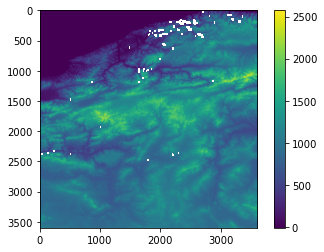

In [6]:
plt.imshow(topomap)
plt.colorbar()

In [7]:
missing_indices = np.isnan(height) # Find the indices of the missing values in x

In [8]:
# Create a new array with the missing values replaced by linearly interpolated values
nan_height = np.interp(np.where(missing_indices)[0], np.where(~missing_indices)[0], height[~missing_indices])

In [9]:
# Replace the missing values with the interpolated values
height[missing_indices] = nan_height

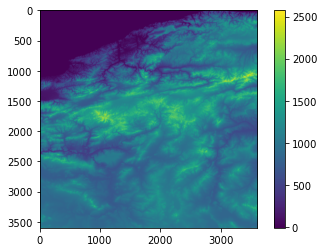

In [10]:
plt.imshow(height.reshape(((3601,3601))))
plt.colorbar()